In [1]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-trig-fft)

This function has frequency content at $2\pi$, $-2\pi$, and $\pi$.

In [2]:
f = @(x) 3 * cos(2*pi * x) - exp(1i*pi * x);

To use `fft`, we set up nodes in the interval $[0,2)$.

In [3]:
n = 4;
N = 2*n + 1;
t = 2 * (0:N-1)' / N;      % nodes in $[0,2)$
y = f(t);

We perform Fourier analysis using `fft` and then examine the resulting coefficients.

In [4]:
c = fft(y) / N;
freq = [0:n, -n:-1]';
format short
disp(table(freq, c, variableNames=["k", "coefficient"]))

    k           coefficient      
    __    _______________________

     0    -7.4015e-17+0i         
     1             -1+3.1961e-16i
     2            1.5-6.7735e-16i
     3     2.0068e-16-3.7007e-17i
     4     9.8686e-17+2.1124e-16i
    -4     9.6148e-17-2.5176e-16i
    -3     2.4341e-16-3.7007e-17i
    -2            1.5+7.2403e-16i
    -1    -9.6148e-17-2.5176e-16i



Note that $1.5 e^{2i\pi x}+1.5 e^{-2i\pi x} = 3 \cos(2\pi x)$, so this result is sensible.

Fourier's greatest contribution to mathematics was to point out that *every* periodic function is just a combination of frequencies—infinitely many of them in general, but truncated for computational use. Here we look at the magnitudes of the coefficients for $f(x) = \exp( \sin(\pi x) )$.

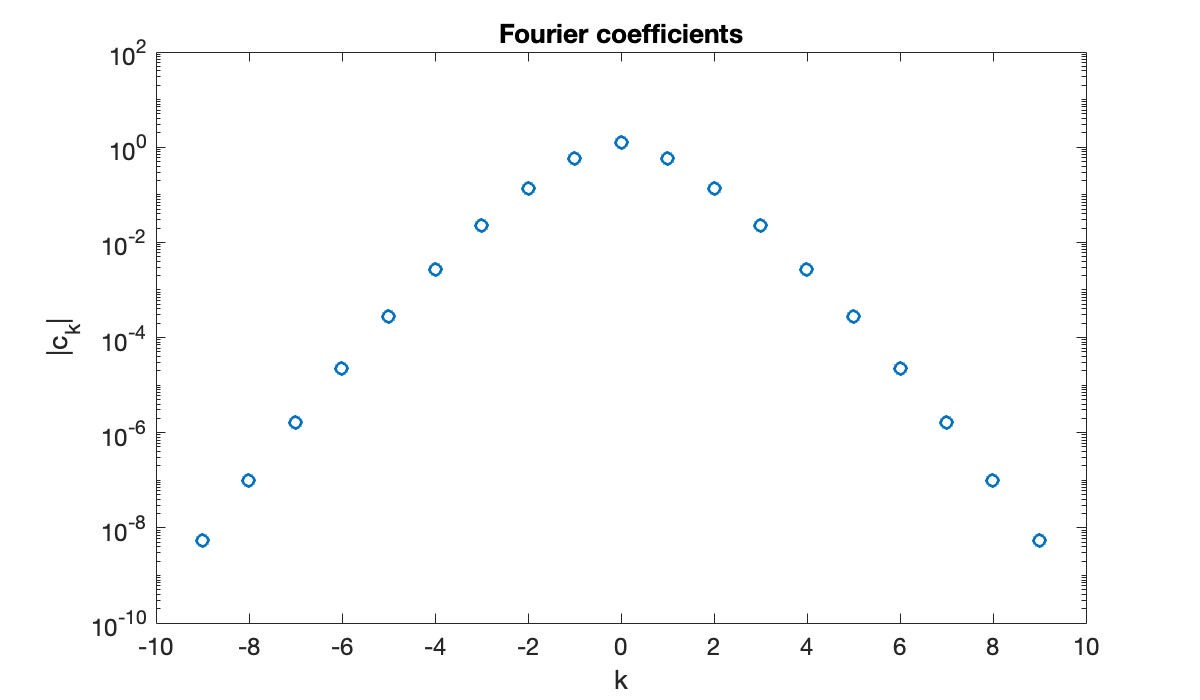

In [5]:
f = @(x) exp( sin(pi*x) );    % content at all frequencies
n = 9;  N = 2*n + 1;
t = 2 * (0:N-1)' / N;         % nodes in $[0,2)$
y = f(t);
c = fft(y) / N;
freq = [0:n, -n:-1]';

clf
semilogy(freq, abs(c), 'o')
xlabel('k'),  ylabel('|c_k|')   
title('Fourier coefficients')    

The Fourier coefficients of smooth functions decay exponentially in magnitude as a function of the frequency. This decay rate is determines the convergence of the interpolation error.